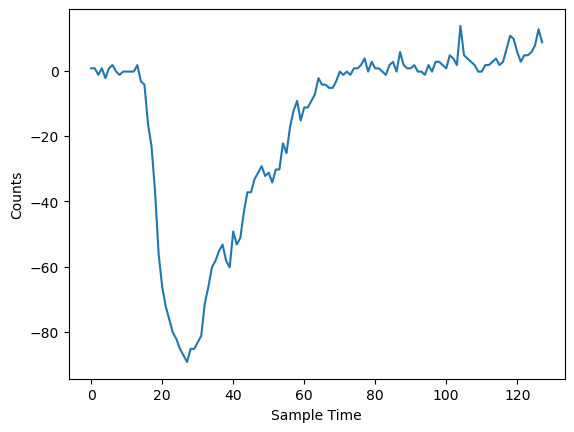

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Create empty arrays to fill
targetWave = [np.zeros(shape=128, dtype=np.float32, order='C') for i in range(100)]

# Load the SiPM waveform data that was recorded by TargetX at 1GSPS
idx = 0
with open('data/klmDbgWaveData_2023-05-25T12-08-16.csv', mode='r', encoding='utf-8-sig') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for row in reader:
        for smpl in range(128):
            targetWave[idx][smpl] = float(row[smpl])
        idx += 1

# Remove the pedatal
for i in range(100):
    for j in range(128):
        targetWave[i][j] -= 3071.22
        
# Plot the 1st waveform as a "sanity check"
plt.xlabel("Sample Time") 
plt.ylabel("Counts") 
plt.plot([float(i) for i in range(128)],targetWave[0]) 
plt.show()

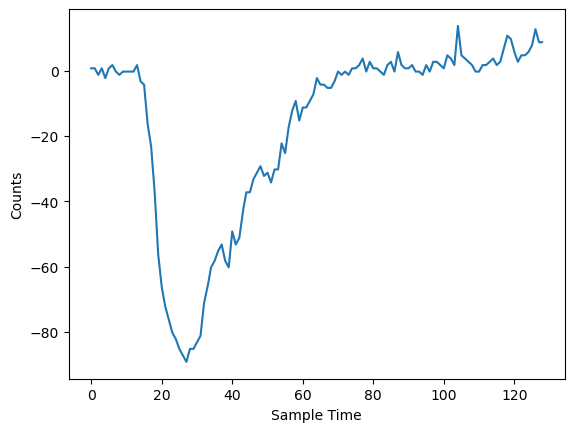

In [2]:
# interpolant waveform at 8GSPS
xAxis1GPS = [float(i)/1.0 for i in range(128)]
xAxis8GPS = [float(i)/8.0 for i in range(1024)]
interpWave = [np.interp(xAxis8GPS, xAxis1GPS, targetWave[i]) for i in range(100)]

# Plot the 1st waveform as a "sanity check"
plt.xlabel("Sample Time") 
plt.ylabel("Counts") 
plt.plot(xAxis8GPS,interpWave[0]) 
plt.show()

In [3]:
with open('../config/SipmWave8GSPS.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i in range(100):
        row = [0 for i in range(1024)]
        for j in range(1024):
            row[j] = int(40.0*interpWave[i][j])
        writer.writerows([row])